# Using feature Normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('ex1data2.txt',names = ['size_house','no_bedrooms','price'])
df.head()

,size_house,no_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


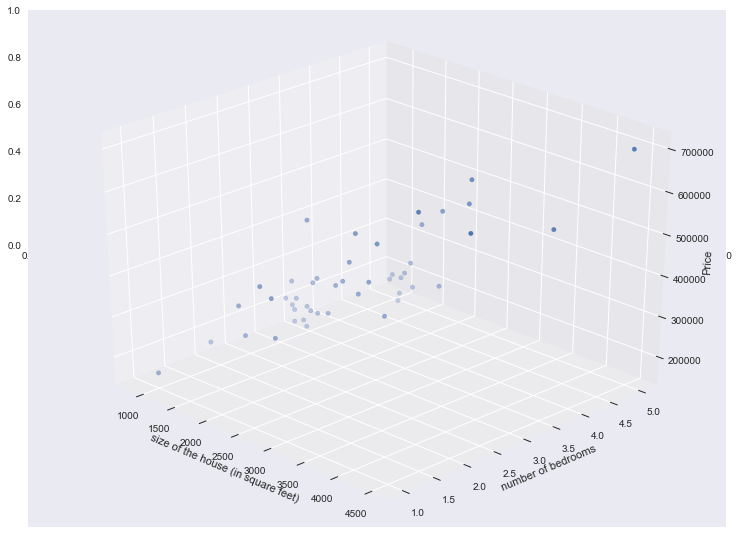

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() 
fig.set_size_inches(12.5, 9.5) 
plt.subplot(2, 1, 1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs= df['size_house'],ys=df['no_bedrooms'],zs = df['price'])
ax.set_xlabel('size of the house (in square feet)'); ax.set_ylabel('number of bedrooms'); ax.set_zlabel('Price')
ax.view_init(30, -45)
plt.show()

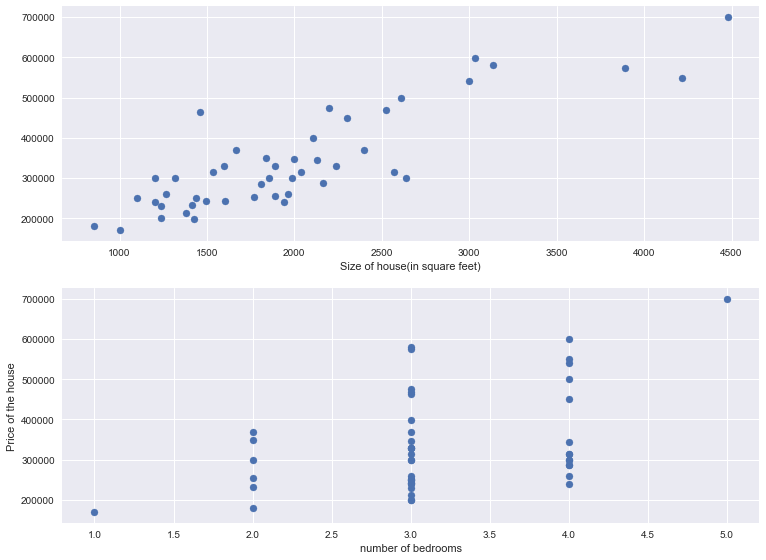

In [4]:
# 2d plots
fig = plt.figure()
fig.set_size_inches(12.5, 9.5)
plt.subplot(2, 1, 1)
plt.scatter(df['size_house'],df['price'])
plt.xlabel('Size of house(in square feet)')

plt.subplot(2, 1, 2)
plt.scatter(df['no_bedrooms'],df['price'])
plt.xlabel('number of bedrooms')
plt.ylabel("Price of the house")

plt.show()


In [5]:
# initialize parameters
alpha = 0.01
num_iters = 400
theta = np.zeros(3)
theta = theta.reshape((len(theta), 1))

In [6]:
# initialize features and price
X = df.as_matrix(['size_house','no_bedrooms'])
y = df.as_matrix(['price'])
m = y.size 

In [7]:
def featureNormalize(X):
    mu = np.mean(X[:,:1])
    sigma = np.std(X[:,:1])
    
    mu1 = np.mean(X[:,1:])
    sigma1 = np.std(X[:,1:])
    
    x_ = (X[:,:1] - mu) / sigma
    x1_ =  (X[:,1:] -mu1) / sigma1
    
    X_norm = np.append( x_,x1_,axis=1)
    return X_norm

In [8]:
X_norm = featureNormalize(X)
#print X_norm
X_norm = np.concatenate((np.ones((m, 1)), X_norm), axis=1)

In [9]:
def computeCostMulti(X,y,theta):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    sq_error = np.sum(np.square(h - y))
    J = (sq_error) / (2 * m)
    return J

In [10]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = []
    m = y.size  
    
    for i in range(num_iters):
        h = np.dot(X, theta)
        theta = theta - ((alpha / m) * (np.dot(X.T, (h - y))))  
        J_history.append(computeCostMulti(X, y, theta))
    return theta,J_history

In [11]:
final_theta , loss = gradientDescentMulti(X_norm,y,theta,0.01,400)
final_theta

array([[ 334302.06399328],
       [  99411.44947359],
       [   3267.01285407]])

In [12]:
#print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $289,221.55"
# normalize it to get the right answer
price = np.dot(X_norm,final_theta)
price = price.reshape(47,)

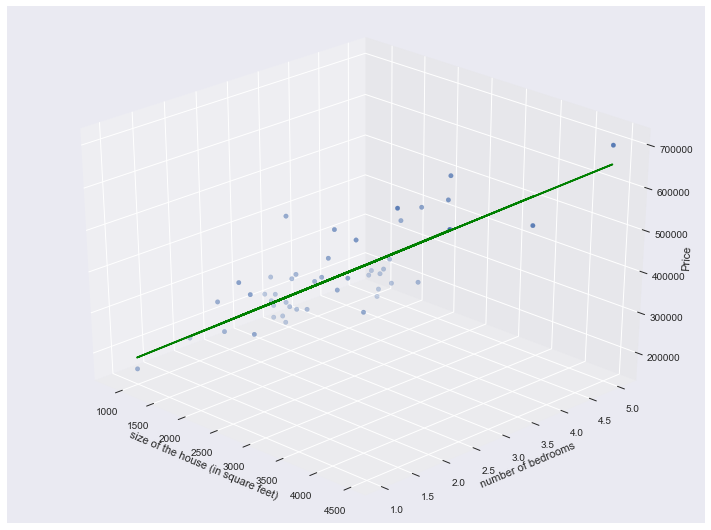

In [13]:
fig2 = plt.figure() 
fig2.set_size_inches(12.5, 9.5) 
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(xs= df['size_house'],ys=df['no_bedrooms'],zs = df['price'])
ax.set_xlabel('size of the house (in square feet)'); ax.set_ylabel('number of bedrooms'); ax.set_zlabel('Price')
ax.plot3D(xs= df['size_house'],ys=df['no_bedrooms'],zs = price,color='green')
ax.view_init(30, -45)
plt.show()

# Normal Equation Method

In [16]:
import numpy as np
import pandas as pd

df = pd.read_csv('ex1data1.txt', names=['X', 'y'])
y = df['y']
m = y.size

X = df.as_matrix(columns=['X'])
X = np.append(np.ones((m, 1)), X, axis=1)

def normalEqn(X, y):
    theta = 0
    theta = np.matmul((np.matmul(np.linalg.inv(np.matmul((X.T), X)), X.T)), y)
    return theta

print "final theta :",normalEqn(X, y)

final theta : [-3.89578088  1.19303364]
